# Analyze TOMT Categories

In [1]:
import pandas as pd
from tqdm import tqdm
import json
path = '/mnt/ceph/storage/data-in-progress/data-research/web-search/false-memories/reddit-tomt/tomt-dataset-03-12-2022/reddit-tomt-submissions-with-comments.jsonl.gz'

## Read dataset

In [2]:
import gzip
with gzip.open(path, 'rt') as f:
    d_all = []
    for line in tqdm(f):
        obj = json.loads(line)
        d_all.append(obj)
df_orig = pd.DataFrame(d_all)

1279425it [03:25, 6219.88it/s] 


In [3]:
df_orig.rename(columns = {'selftext':'content'}, inplace = True)

## Check data

In [5]:
len(df_orig)

1279425

In [11]:
df_orig[['created_utc', 'link_flair_text', 'title', 'content']]

,created_utc,link_flair_text,title,content
0,1409620809,None,[TOMT] song about a child by a young mother,It was a video posted a couple of months ago. ...
1,1409621706,Solved,[TOMT][BOOK] Book I read in 3rd grade,There was a book I read in third grade... here...
2,1409621747,None,[TOMT][music] looking for an album cover...,The cover has a dark circular face..could be a...
3,1409621789,Solved,"[TOMT] [Song] Chill, repeats ""faded away""","It's a chill song, laid back, kind of melancho..."
4,1409621843,Open,[TOMT][Movie] Asian Mystery/Horror/Supernatura...,I have a really vague memory of it. I don't ev...
...,...,...,...,...
1279420,1646024478,Solved,[TOMT][SONG][1970s] Classic rock song,The guitar used at the beginning of [Caroline ...
1279421,1646024504,Open,[TOMT] Trying to remember a method to search f...,Hello guys. I'm trying to remember a method th...
1279422,1646025318,Solved,[TOMT] 2018~2019 Tiktok “Trend” w/ Blonde Girl...,back in 2018-2019ish when that one viral video...
1279423,1646025501,Open,"[TOMT] Band similiar to disturbed, can only re...",I listened to this band years ago so I only re...


## Get Most Common Categories

In [12]:
categories = []

In [13]:
import seaborn as sns
import re

In [14]:
def extract_category(title):
    ret = re.findall(r'\[.*?\]', title)
    return [x.lower() for x in ret]

In [16]:
# Determine distribution across the categories
tmp = [extract_category(i) for i in df_orig['title']]
categories = {}
for i in tmp:
    for j in i:
        k = j.lower()
        if k in categories:
            categories[k] = categories[k] + 1
        else:
            categories[k] = 1

In [34]:
from collections import OrderedDict
import numpy as np

keys = list(categories.keys())
values = list(categories.values())
sorted_value_index = np.argsort(values)[::-1][:len(keys)]
categories_sort = {keys[i]: values[i] for i in sorted_value_index}

In [35]:
from itertools import islice
def take (n, iterable):
    return list(islice(iterable, n))

In [36]:
take(8, categories_sort.items())

[('[tomt]', 1247315),
 ('[song]', 161385),
 ('[movie]', 158543),
 ('[video]', 67642),
 ('[music]', 47591),
 ('[book]', 47578),
 ('[2000s]', 38200),
 ('[game]', 32961)]

In [40]:
# get top-100 categories
n = 0
top_100_categories = {}
for i in categories_sort:
    if n == 0:
        n = n+1
        continue
    n = n+1
    if(n > 100):
        break
    top_100_categories[i] = categories_sort[i]
take(7, top_100_categories.items())

[('[song]', 161385),
 ('[movie]', 158543),
 ('[video]', 67642),
 ('[music]', 47591),
 ('[book]', 47578),
 ('[2000s]', 38200),
 ('[game]', 32961)]

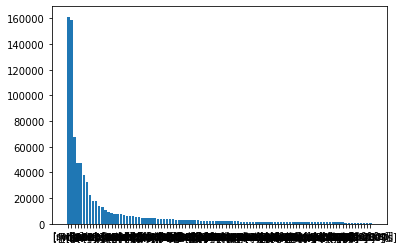

In [41]:
# plot distribution of top-100 categories
import matplotlib.pyplot as plt

plt.bar(range(len(top_100_categories)), list(top_100_categories.values()), tick_label=list(top_100_categories.keys()))
plt.show()